In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [22]:
current_dir = os.getcwd()
df = pd.read_csv(f'{current_dir}\\Airbnb_Open_Data.csv')
df_copy = df.copy()

df_copy.columns

C:\Users\Admin\AppData\Local\Temp\ipykernel_2592\663296925.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{current_dir}\\Airbnb_Open_Data.csv')


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [23]:
columns_to_drop = ['id', 'NAME', 'host id', 'host name', 'neighbourhood group', 'neighbourhood', 'last review', 'lat', 'long', 'country', 'country code', 'Construction year', 'last review', 'house_rules', 'license']
# columns_to_drop = ['id', 'NAME', 'host id', 'host name', 'neighbourhood group', 'neighbourhood', 'last review', 'reviews per month', 'lat', 'long', 'country', 'country code', 'Construction year', 'last review', 'house_rules', 'license']

df_copy.drop(columns=columns_to_drop, inplace=True)
df_copy.isnull().sum()

host_identity_verified              289
instant_bookable                    105
cancellation_policy                  76
room type                             0
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

In [24]:
df_copy.describe()

,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,102352.000000,102326.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,625.293536,125.026924,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,331.671614,66.325739,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,340.000000,68.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,624.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,913.000000,183.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [25]:
df_copy = df_copy[(df_copy['minimum nights'] >= 0) & (df_copy['minimum nights'] <= 8) & (df_copy['availability 365'] >= 0) & (df_copy['availability 365'] <= 365)]
df_copy['price_per_night'] = df_copy['price'] / df_copy['minimum nights']
df_copy['review_ratio'] = df_copy['number of reviews'] / df_copy['reviews per month'].replace(0, np.nan)
df_copy['is_long_term'] = df_copy['minimum nights'].apply(lambda x: 1 if x > 31 else 0)

In [26]:
df_copy['price'] = pd.qcut(df_copy['price'], q=3, labels=['low','medium','high'])

In [27]:
df_copy.fillna(df_copy.median(numeric_only=True), inplace=True)

for col in df_copy.select_dtypes(include=['object', 'category']).columns:
    df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)
    
df_copy.isnull().sum()


C:\Users\Admin\AppData\Local\Temp\ipykernel_2592\909436839.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2592\909436839.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[col].fillna(df_copy[col]

host_identity_verified            0
instant_bookable                  0
cancellation_policy               0
room type                         0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
price_per_night                   0
review_ratio                      0
is_long_term                      0
dtype: int64

In [28]:
df_copy.columns

Index(['host_identity_verified', 'instant_bookable', 'cancellation_policy',
       'room type', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'price_per_night',
       'review_ratio', 'is_long_term'],
      dtype='object')

In [29]:
df_copy['instant_bookable'] = df_copy['instant_bookable'].astype(str).str.strip().str.upper()
df_copy['instant_bookable'] = df_copy['instant_bookable'].apply(lambda x: 1 if x == 'TRUE' else 0)
df_copy['price'] = df_copy['price'].apply(lambda x: 2 if x == 'high' else 1 if x == 'medium' else 0)
df_copy['instant_bookable'].value_counts()


instant_bookable
0    40424
1    40156
Name: count, dtype: int64

In [30]:
dummies_columns = ['host_identity_verified', 'cancellation_policy', 'room type']
df_copy = pd.get_dummies(df_copy, columns=dummies_columns, drop_first=True, dummy_na=False, dtype=int)
df_copy.head(1)

,instant_bookable,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,price_per_night,review_ratio,is_long_term,host_identity_verified_verified,cancellation_policy_moderate,cancellation_policy_strict,room type_Hotel room,room type_Private room,room type_Shared room
2,1,1,124.0,3.0,0.0,0.98,5.0,1.0,352.0,206.666667,22.330097,0,1,0,0,0,1,0


In [31]:
df_copy.columns

Index(['instant_bookable', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'price_per_night',
       'review_ratio', 'is_long_term', 'host_identity_verified_verified',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'room type_Hotel room', 'room type_Private room',
       'room type_Shared room'],
      dtype='object')

In [32]:
df_copy.corr()['price']

instant_bookable                   0.005531
price                              1.000000
service fee                        0.939913
minimum nights                    -0.004750
number of reviews                  0.003879
reviews per month                  0.004935
review rate number                -0.003466
calculated host listings count    -0.000072
availability 365                  -0.001878
price_per_night                    0.601404
review_ratio                       0.001519
is_long_term                            NaN
host_identity_verified_verified   -0.005648
cancellation_policy_moderate       0.002584
cancellation_policy_strict        -0.004098
room type_Hotel room               0.001856
room type_Private room            -0.002636
room type_Shared room              0.001141
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

X = df_copy.drop(columns=['price', 'service fee'])
y = df_copy['price']

# Replace inf/-inf with nan, then fill nan with column median
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

In [34]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

d:\63947\Documents\GitHub\ThirdYearProjects\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


array([1, 0, 2, ..., 1, 2, 1], shape=(20145,))

In [35]:
confusion_matrix = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix:\n", confusion_matrix)

accuracy_score = accuracy_score(y_test, y_pred)
print("Confusion Matrix Accuracy Score:", accuracy_score)

f1_score = f1_score(y_test, y_pred, average='weighted')
print("Confusion Matrix F1 Score:", f1_score)

precision_score = precision_score(y_test, y_pred, average='weighted')
print("Precision Score:", precision_score)

recall_score = recall_score(y_test, y_pred, average='weighted')
print("Recall Score:", recall_score)


Confusion Matrix:
 [[2680 2452 1626]
 [2625 2497 1576]
 [2577 2532 1580]]
Confusion Matrix Accuracy Score: 0.3354182179200794
Confusion Matrix F1 Score: 0.3313982338460207
Precision Score: 0.3347509382359167
Recall Score: 0.3354182179200794


In [36]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# #Create a rf Classifier
# rf = RandomForestClassifier()
# rf.fit(X_train_rf, y_train_rf)


In [37]:
param_dist = {'n_estimators': randint(50,200),
                'max_depth': randint(3, 5)}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                    param_distributions = param_dist, 
                                    n_iter=5, 
                                    cv=5)

# Fit the random search object to the data
rand_search.fit(X_train_rf, y_train_rf)

best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'n_estimators': 127}


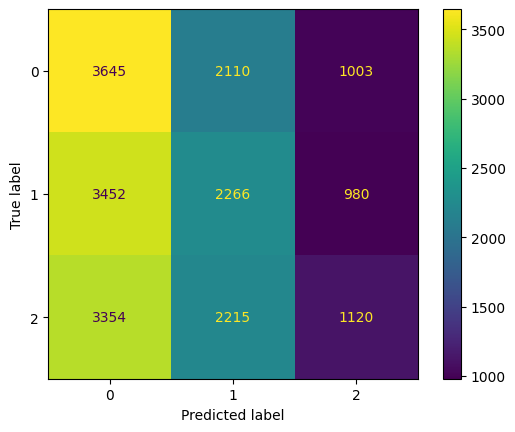

In [38]:
# Generate predictions with the best model
y_pred_rf = best_rf.predict(X_test_rf)

# Create the confusion matrix
cm = confusion_matrix(y_test_rf, y_pred_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [39]:

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))


Accuracy: 0.34901960784313724


<Axes: >

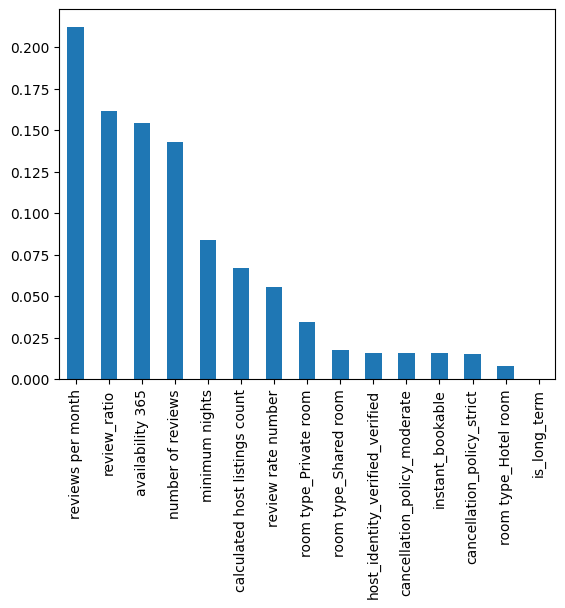

In [40]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train_rf.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()